In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 8, 6

In [2]:
#load cleaned data
data = pd.read_csv('data/clean_titanic.csv')

# 1. Automatic Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having too many irrelevant features in your data can decrease the accuracy of the models. 

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

You can use the following approach

- Univariate statistics: Check statisticall significance relation between feature and target
- Model-base selection:
- Iterative selection:


**Univariate statistics** 
- Check statisticall significance relation between feature and target.
- select the one with high confidence

Advantage: Very fast to compute, doesnt require building models

Disadvantage: Independent of the model

** Model-based Feature Selection**
- Use a supervised machine learning model to judge the importance of each feature.

Advantages: Consider all features at once.

**Iterative Feature Selection**
A series of models are built with varying number of features. Implemented in Sklearn as [Recursive feature elimination (RFE)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

## 1.2.  Model - based feature Selection : Using **Feature Importance**

Using RandomForest Classifier

In [4]:
# Load the packages for modeling
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Define a classifier
rforest = RandomForestClassifier(max_depth=15,n_estimators=70, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)

In [9]:
# Prepare Feature and Target
data.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked'],
      dtype='object')

In [7]:
feature = ['pclass',  'sex', 'age', 'sibsp', 'parch','fare', 'embarked']

In [10]:
X = data[feature]
y = data.survived

In [11]:
# Fit the model
rforest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

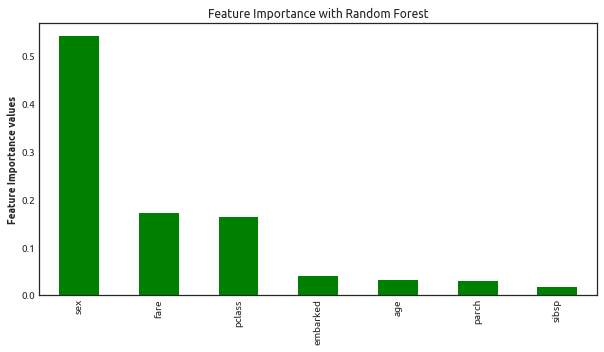

In [12]:
# Plot the important features
imp_feat_rf = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending=False)
imp_feat_rf.plot(kind='bar', title='Feature Importance with Random Forest', figsize=(10,6),color='g')
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)

## 1.3 Model - based feature Selection : Using **SelectFromModel**

In [13]:
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42) , threshold="median")

In [14]:
select.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='median')

In [15]:
X_features = select.transform(X)
print('Original features', X.shape)
print('Selected features', X_features.shape)

Original features (1309, 7)
Selected features (1309, 4)


Print the selected features

In [16]:
for feature_list_index in select.get_support(indices=True):
    print(feature[feature_list_index])

pclass
sex
age
fare


Feature selected are: pclass, Sex, age and fare

## 2. Model Selection

How do you choose the best model for your problem?

When you work on a machine learning project, you often end up with multiple good models to choose from. Each model will have different performance characteristics.

Using resampling methods like cross validation to evaluate and select the best model.

## 2. 1 Cross validation
Statistical method for evaluating how well a given algorithm will generalize when trained on a specific data set.

In cross validation we split the data repetedely and train a multiple models.

**Types of cross-validation**

- K-fold cross validation
- Startified K-fold cross validation
- Leave-one-out cross validation
- Shaffle-split cross validation


## 2. 2 Evaluation Metrics 
- Accuracy
- Confusion matrix
- Precision
- Recall
- F-score

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from time import time

In [23]:
from sklearn.model_selection import train_test_split
feature = ['pclass',  'sex', 'age','fare']
X = data[feature]
y = data.survived
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=1234)

In [42]:
def classifiers(X_train,y_train, X_test, y_test, score='f1'):
    knn     =  KNeighborsClassifier()
    gnb     =  GaussianNB()
    log     =  LogisticRegression()
    dTree   =  tree.DecisionTreeClassifier()
    rForest =  RandomForestClassifier()
    mlp     =  MLPClassifier()
    adboost = AdaBoostClassifier()
    lda     = LDA(solver='lsqr', shrinkage='auto')
    qda     = QDA()
    
    model_names = ["Nearest Neighbors",
                   "Naive Bayes",
                   "Logistic",
                   "Decision Tree",
                   "Random Forest",
                   "MLP",
                   "AdaBoost",
                   "LDA",
                   "QDA"]
    models = [knn, gnb, log, dTree, rForest, mlp,adboost,lda,qda]
     
    name= []
    results=[]
    avg_results = []
    f_score_test= []
    acc_test = []
    model_time = []
    for (i,model) in enumerate(models):
      
        skfold = model_selection.StratifiedKFold(n_splits=10)
        start = time()
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        end = time()
        results.append(cv_results)
        avg_results.append(cv_results.mean())
        msg = "%s: %f" % (model_names[i], cv_results.mean())
        print(msg)
        
        print("Run test perfomance")
        model.fit(X_train, y_train)
        y_p = model.predict(X_test)
        f_score = f1_score(y_test, y_p)
        f_score_test.append(f_score)
        acc  = accuracy_score(y_test,y_p)
        acc_test.append(acc)
        model_time.append((end - start))
        
    return avg_results, model_names, f_score_test, acc_test, model_time   

In [27]:
result, names, f_score_test, acc_test, model_time  = classifiers(X_train,y_train,X_test,y_test)

Nearest Neighbors: 0.579375
Run test perfomance
Naive Bayes: 0.702412
Run test perfomance
Logistic: 0.703763
Run test perfomance
Decision Tree: 0.678769
Run test perfomance
Random Forest: 0.705086
Run test perfomance
MLP: 0.575528
Run test perfomance
AdaBoost: 0.707315
Run test perfomance
LDA: 0.703806
Run test perfomance
QDA: 0.666281
Run test perfomance


In [37]:
def plotbar(plot_name, names, result,title,ylabel):
    postion = np.arange(len(names))
    plt.bar(postion, result, align='center', color ='g')
    plt.xticks(postion, names, rotation=90)
    plt.ylabel(ylabel)
    #plt.ylim(0,1)
    plt.title(title)
    #plt.savefig('image/%s.pdf' %(plot_name), format='pdf')
    

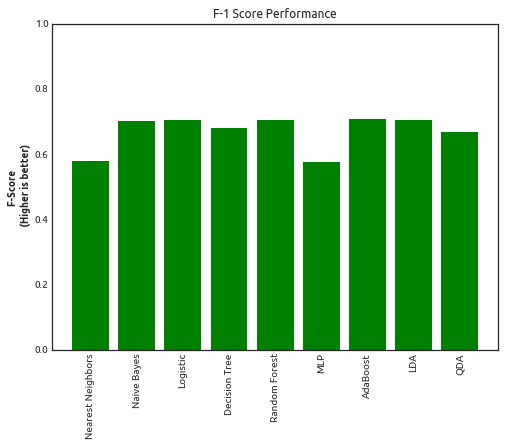

In [35]:
plotbar("avg_score", names, result, "F-1 Score Performance", "F-Score \n (Higher is better)")

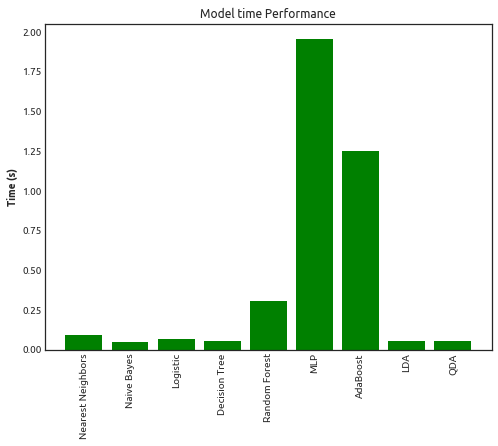

In [41]:
time = np.array(model_time) * -1
plotbar("Time_perfomance", names, time, "Model time Performance", "Time (s)")

From the above experiment, will consider Random Forest and KNN models in the next experiment.